In [12]:
import numpy as np
import matplotlib.pyplot as plt
import sys

Load whole data

In [13]:
filename = '#1_pad3_pw200_ams100ms.txt'
rawData = np.genfromtxt(filename)

In [14]:
copy_data = rawData.copy()
add = np.zeros((len(copy_data), 1), dtype='float')
copy_data = np.append(copy_data, add, axis = 1)

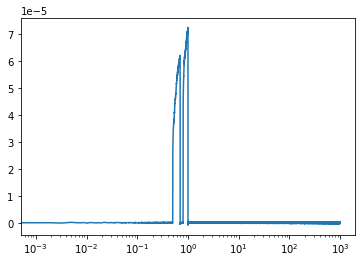

In [15]:
plt.plot(copy_data[0:len(copy_data),0], copy_data[0:len(copy_data), 1])
plt.xscale("log")
plt.show()

In [16]:
for i in range(len(copy_data)-1):
    h = 0.000100001
    f_0 = copy_data[i][1]
    f_1 = copy_data[i+1][1]
    copy_data[i][2] = (f_1 - f_0)/h

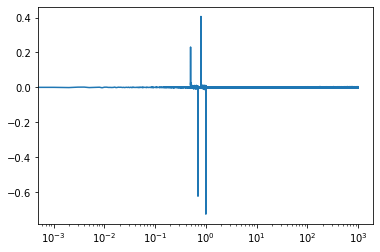

In [17]:
plt.plot(copy_data[0:len(copy_data),0], copy_data[0:len(copy_data), 2])
plt.xscale("log")
plt.show()

In [26]:
min_array = copy_data.copy()
min_array = min_array[min_array[:, 2].argsort()]
min_array = min_array[:5]

time_temp = 0.0000000
min_rate_of_change = 0.0
for i in range(len(min_array)):
    if min_array[i][2] < -0.2 and min_array[i][0] > time_temp:
        time_temp = min_array[i][0]
        min_rate_of_change = min_array[i][2]

min_array_idx = np.where((copy_data[:, 2] == min_rate_of_change))
x_second_idx = min_array_idx[0][0]
x_second = float(x_second_idx)*(1/1000) + float(x_second_idx)*(1/1000000000)
x_second_value = copy_data[x_second_idx][1]

print(min_array)

[[ 1.00000100e+00  7.22968129e-05 -7.26888844e-01]
 [ 7.00000700e-01  6.20502550e-05 -6.24105185e-01]
 [ 9.39000939e-01  6.87228033e-05 -1.28280137e-02]
 [ 6.35000635e-01  5.67945463e-05 -9.60505495e-03]
 [ 5.72000572e-01  4.81786303e-05 -9.25404046e-03]]


In [19]:
print(np.where(copy_data[:, 2] == min_rate_of_change))

(array([1000], dtype=int64),)


In [23]:
interval = input("input interval")
pulse_width = input("input pulse width")
interval = float(interval) * (1/1000) + float(interval) * (1/1000000000)
pulse_width = float(pulse_width) * (1/1000)  + float(pulse_width) * (1/1000000000)

subtract = interval + pulse_width
x_first = x_second - subtract
x_fisrt_idx = np.where((copy_data[:, 0]) == round(x_first, 10))

print(subtract)

0.3000003


In [21]:
x_fisrt_idx = x_fisrt_idx[0][0]
x_first_value = copy_data[x_fisrt_idx][1]
first_rate_of_change = copy_data[x_fisrt_idx][2]

print("fisrt time:", x_first)
print("first value:", x_first_value)
print("rate of change:", first_rate_of_change)
print("--------------------------------------")
print("seconde time:", x_second)
print("second value:", x_second_value)
print("rate of change:", min_rate_of_change)

fisrt time: 0.7000006999999999
first value: 6.2050255e-05
rate of change: -0.6241051852481475
--------------------------------------
seconde time: 1.000001
second value: 7.22968129e-05
rate of change: -0.726888844411556


In [22]:
get_ratio = x_first_value / x_second_value
print(filename)
print(get_ratio)

#1_pad3_pw200_ams100ms.txt
0.858270959825395
